In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seatsvotes

In [3]:
house = seatsvotes.data.congress(geo=True)
house = house.query('year in (2006,2008)')

In [4]:
house.head()

,index,congress,year,delsouth,state_fips,contest_ui,inc,king_dist,lewis_dist,state_name,turnout,vote_share,geom_uid,geometry
1740,8257,110,2006,1,12,110012021,-1,NaN,21,florida,112306.0,0.405339,012108112021,POLYGON ((-80.30847300000001 25.77737699999997...
1741,8258,110,2006,1,05,110005003,-1,NaN,3,arkansas,200924.0,0.377680,005108112003,POLYGON ((-94.43377207885037 35.31490172478177...
1742,8259,110,2006,1,12,110012017,1,NaN,17,florida,90663.0,1.000000,012108112017,"POLYGON ((-80.184569 25.84757400000002, -80.18..."
1743,8260,110,2006,1,12,110012018,-1,NaN,18,florida,128130.0,0.378514,012108112018,"(POLYGON ((-80.312274 25.638081, -80.312174 25..."
1744,8261,110,2006,1,12,110012020,1,NaN,20,florida,NaN,1.000000,012108112020,"(POLYGON ((-80.214769 26.04646699999997, -80.2..."


In [5]:
house['district_id'] = house.contest_ui.apply(lambda x: x[3:])

In [6]:
bootstrapper = seatsvotes.Bootstrap(house, 
                                    uncontested='ignore',
                                    district_id='district_id')

/home/lw17329/Dropbox/dissert/dev/seatsvotes/seatsvotes/utils.py:30: UserWarning: computing redistricting from years vector
  warn('computing redistricting from years vector')
/home/lw17329/anaconda/envs/ana/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [7]:
bootstrapped = bootstrapper.simulate_elections(n_sims=1000)

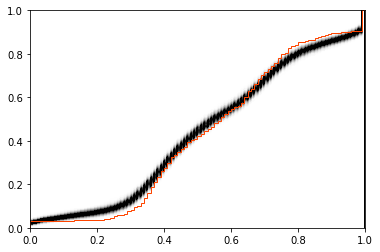

In [8]:
seatsvotes.plot.cdf_shroud(house.query('year == 2008').vote_share,
                           bootstrapped)